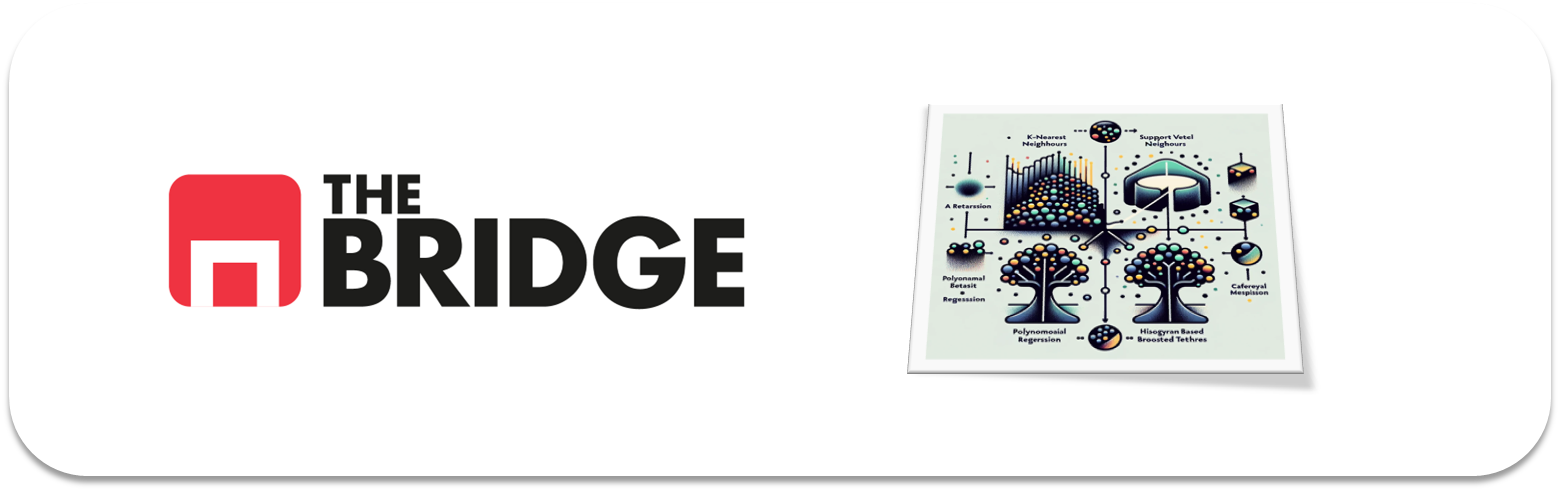

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
# Ruta del archivo
file_path = 'C:\\Users\\migue\\Documents\\GitHub\\ONLINE_DS_THEBRIDGE_Miguel_repo_test\\Sprint_12\\Unidad_02\\Practica_Obligatoria\\data\\wines_dataset.csv'

# Cargar el dataset con el delimitador correcto
wines_df = pd.read_csv(file_path, delimiter='|')

# Crear una copia del dataset
wines_copy = wines_df.copy()

# Mostrar las primeras filas y la información general del dataset
print(wines_copy.head())
print(wines_copy.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  

In [3]:
print(wines_copy.head(30))

# Mostrar información general del dataset
print(wines_copy.info())

# Mostrar estadísticas descriptivas del dataset
print(wines_copy.describe())

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             8.5             0.210         0.26            9.25      0.034   
1             8.3             0.160         0.37            7.90      0.025   
2             6.8             0.180         0.38            1.40      0.038   
3             6.1             0.260         0.25            2.90      0.047   
4             7.5             0.630         0.27            2.00      0.083   
5             5.7             0.265         0.28            6.90      0.036   
6             6.6             0.210         0.31           11.40      0.039   
7             6.7             0.310         0.30            2.10      0.038   
8             8.9             0.750         0.14            2.50      0.086   
9             7.5             0.420         0.20            1.40      0.060   
10            5.5             0.335         0.30            2.50      0.071   
11            6.7             0.700         0.08    

Clasificación:

- El target será la columna quality.
- Las características predictoras serán el resto de las columnas, excepto class (no es relevante para la predicción de quality).

Regresión:

- El target será la columna alcohol.

In [4]:
# Variables para clasificación
target_clasificacion = 'quality'
features_clasificacion = wines_copy.drop(columns=[target_clasificacion, 'class']).columns.tolist()

# Variables para regresión
target_regresion = 'alcohol'
features_regresion = wines_copy.drop(columns=[target_regresion, 'class']).columns.tolist()

# Imprimir resumen de las variables
print("Clasificación:")
print(f"Target: {target_clasificacion}")
print(f"Features: {features_clasificacion}\n")

print("Regresión:")
print(f"Target: {target_regresion}")
print(f"Features: {features_regresion}")

Clasificación:
Target: quality
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Regresión:
Target: alcohol
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


C:\Users\migue\AppData\Local\Temp\ipykernel_60808\3006600351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wines_copy, x=target_clasificacion, palette='viridis')


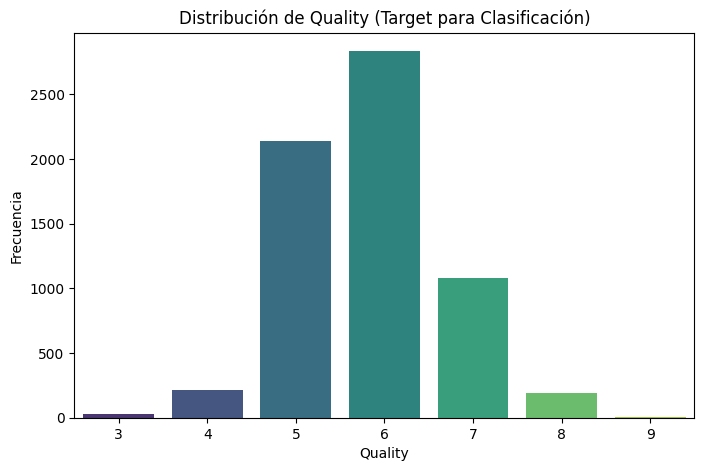

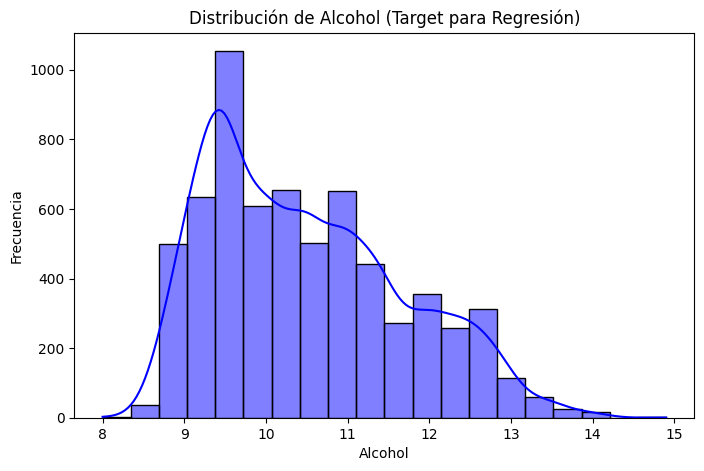

In [5]:
# Distribución de la variable target (Clasificación)
plt.figure(figsize=(8, 5))
sns.countplot(data=wines_copy, x=target_clasificacion, palette='viridis')
plt.title('Distribución de Quality (Target para Clasificación)')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable target (Regresión)
plt.figure(figsize=(8, 5))
sns.histplot(data=wines_copy, x=target_regresion, kde=True, color='blue', bins=20)
plt.title('Distribución de Alcohol (Target para Regresión)')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
# Poslbes puntos para tener en cuenta y ver el assessment previo
print("Assessment previo:")
print("\nClasificación:")
print("- Desbalance de clases observado en el target 'quality'.")
print("- Estrategias posibles: ponderación de clases, SMOTE, o undersampling.")
print("- Métrica prioritaria: Recall medio (weighted).")

print("\nRegresión:")
print("- Distribución sesgada hacia la derecha en el target 'alcohol'.")
print("- Estrategias posibles: usar métricas robustas como MAE o MAPE.")
print("- Métrica prioritaria: MAPE (error porcentual absoluto medio).")

Assessment previo:

Clasificación:
- Desbalance de clases observado en el target 'quality'.
- Estrategias posibles: ponderación de clases, SMOTE, o undersampling.
- Métrica prioritaria: Recall medio (weighted).

Regresión:
- Distribución sesgada hacia la derecha en el target 'alcohol'.
- Estrategias posibles: usar métricas robustas como MAE o MAPE.
- Métrica prioritaria: MAPE (error porcentual absoluto medio).


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [7]:
# Definir variables predictoras y target
X = wines_copy[features_clasificacion]
y = wines_copy[target_clasificacion]

# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar resultados para verificar
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("\nPrimeras 5 filas de X_train escalado:")
print(X_train_scaled[:5])

Tamaño de X_train: (4547, 11)
Tamaño de X_test: (1950, 11)

Primeras 5 filas de X_train escalado:
[[-0.01844362  0.37921653  1.1835189  -0.90897083 -0.23367523 -1.08987539
   0.38782035 -0.60764959 -1.30038619 -0.74591284 -0.99226343]
 [ 0.28720789 -0.11639589  0.15306155  2.66530037 -0.05809057  0.7433437
   1.42600553  2.00600882  0.02166803  0.12343638 -1.24462191]
 [-0.01844362  1.43239292 -1.83915597 -0.66032588  0.73204035 -0.81211492
  -1.40700827  0.29885979  1.02894743  0.45780147 -0.15106852]
 [ 0.13438214 -0.92176607 -0.05302991  1.86756448 -0.32146755  0.46558323
   1.35562009  1.27815458 -0.73379152 -0.2109287  -1.07638293]
 [ 1.28057531  3.10508482  0.15306155 -0.84680959 -0.17514701 -1.47874004
  -1.8645136   0.2657755  -0.6078816  -0.34467474 -1.16050242]]


C:\Users\migue\AppData\Local\Temp\ipykernel_60808\4202083383.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")
C:\Users\migue\AppData\Local\Temp\ipykernel_60808\4202083383.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis")


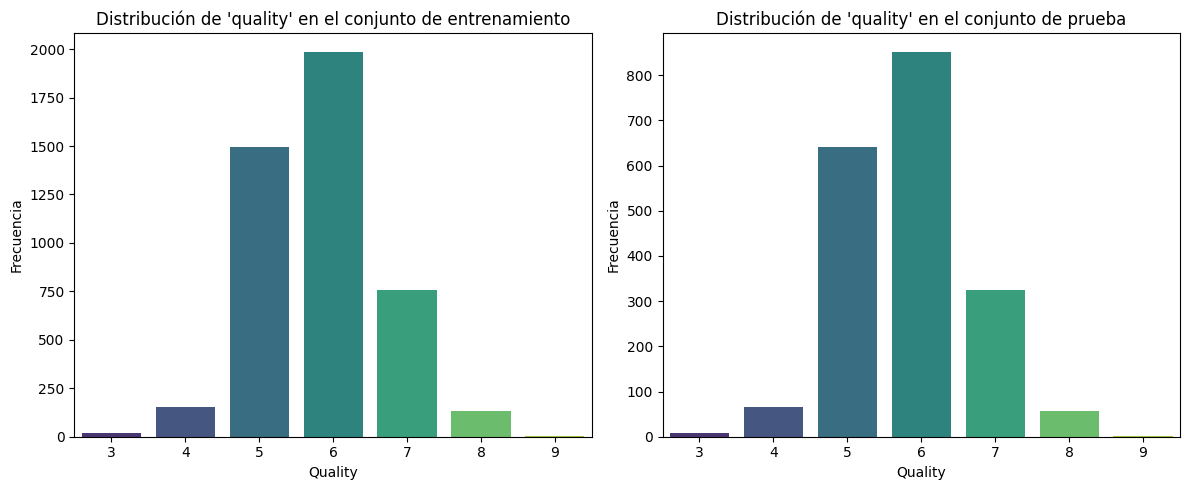

In [8]:
# Gráficos para las distribuciones de `quality`
plt.figure(figsize=(12, 5))

# Distribución en el conjunto de entrenamiento
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribución de 'quality' en el conjunto de entrenamiento")
plt.xlabel("Quality")
plt.ylabel("Frecuencia")

# Distribución en el conjunto de prueba
plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette="viridis")
plt.title("Distribución de 'quality' en el conjunto de prueba")
plt.xlabel("Quality")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Probar con diferentes valores de K (3,5)
k_values = [3, 5]
results = {}

for k in k_values:
    # Crear el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Validación cruzada (5 folds) usando recall medio ponderado
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='recall_weighted')
    
    # Guardar resultados
    results[k] = scores
    
    # Mostrar los resultados
    print(f"K={k}: Recall medio (ponderado) en validación cruzada: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Comparación de resultados
best_k = max(results, key=lambda k: np.mean(results[k]))
print(f"\nEl mejor K basado en recall medio ponderado es: {best_k}")

c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


K=3: Recall medio (ponderado) en validación cruzada: 0.5386 (+/- 0.0108)
K=5: Recall medio (ponderado) en validación cruzada: 0.5487 (+/- 0.0246)

El mejor K basado en recall medio ponderado es: 5


- El modelo baseline KNN con K=5 tiene un desempeño aceptable (recall medio ponderado de ~0.55).
- Este resultado sirve como punto de partida para comparar otros modelos más complejos.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Crear diccionario para almacenar resultados
model_results = {}

# Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='recall_weighted')
model_results['Logistic Regression'] = log_reg_scores
print(f"Regresión Logística: Recall medio ponderado: {log_reg_scores.mean():.4f} (+/- {log_reg_scores.std():.4f})")

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='recall_weighted')
model_results['Random Forest'] = rf_scores
print(f"Random Forest: Recall medio ponderado: {rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")

c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Regresión Logística: Recall medio ponderado: 0.5399 (+/- 0.0092)


c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Recall medio ponderado: 0.6556 (+/- 0.0131)


- Random Forest es el modelo más prometedor hasta ahora, con un recall medio ponderado significativamente mejor que KNN y Regresión Logística.


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo base
rf_clf = RandomForestClassifier(random_state=42)

# Definir el rango de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Aborda el desbalance de clases
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,
    scoring='recall_weighted',
    n_jobs=-1,  # Usa todos los procesadores disponibles
    verbose=2
)

# Realizar la búsqueda
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el recall medio ponderado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor recall medio ponderado en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor recall medio ponderado en validación cruzada: 0.6593331640856394


Recall medio ponderado en el conjunto de prueba: 0.6728


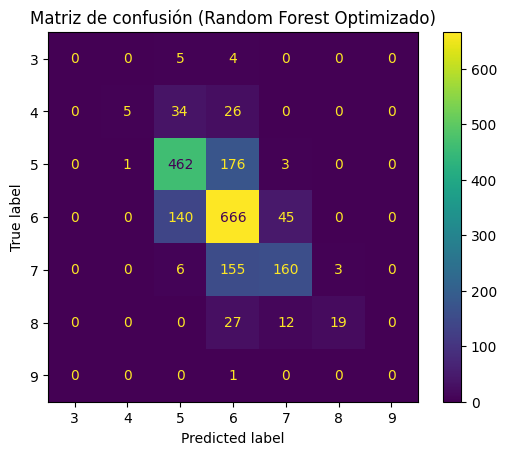

Reporte de clasificación:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.83      0.08      0.14        65
           5       0.71      0.72      0.72       642
           6       0.63      0.78      0.70       851
           7       0.73      0.49      0.59       324
           8       0.86      0.33      0.47        58
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.54      0.34      0.37      1950
weighted avg       0.68      0.67      0.66      1950



c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\migue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Entrenar el modelo final con los mejores hiperparámetros
final_rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
final_rf_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = final_rf_model.predict(X_test)

# Métrica: Recall medio ponderado
recall_test = final_rf_model.score(X_test, y_test)
print(f"Recall medio ponderado en el conjunto de prueba: {recall_test:.4f}")

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(final_rf_model, X_test, y_test)
plt.title("Matriz de confusión (Random Forest Optimizado)")
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

- El modelo optimizado logra un buen desempeño global, con un recall medio ponderado razonable (0.6728).
- El desbalance de clases sigue siendo un problema para las clases minoritarias (3, 4, 8, 9).
- La clase mayoritaria (6) domina el desempeño del modelo, lo que puede sesgar la interpretación general.


Errores por combinación de etiquetas verdaderas y predichas:
    True Label  Predicted Label  Count
0            3                5      5
1            3                6      4
2            4                4      5
3            4                5     34
4            4                6     26
5            5                4      1
6            5                5    462
7            5                6    176
8            5                7      3
9            6                5    140
10           6                6    666
11           6                7     45
12           7                5      6
13           7                6    155
14           7                7    160
15           7                8      3
16           8                6     27
17           8                7     12
18           8                8     19
19           9                6      1


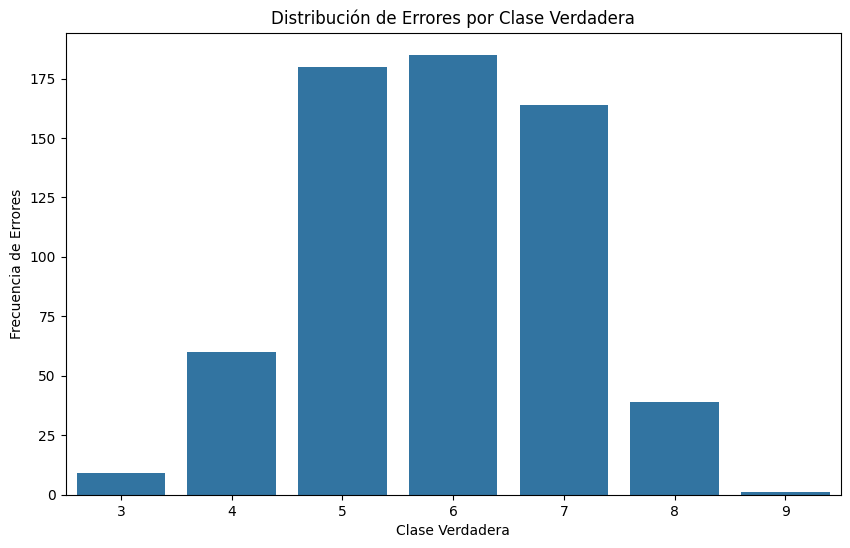

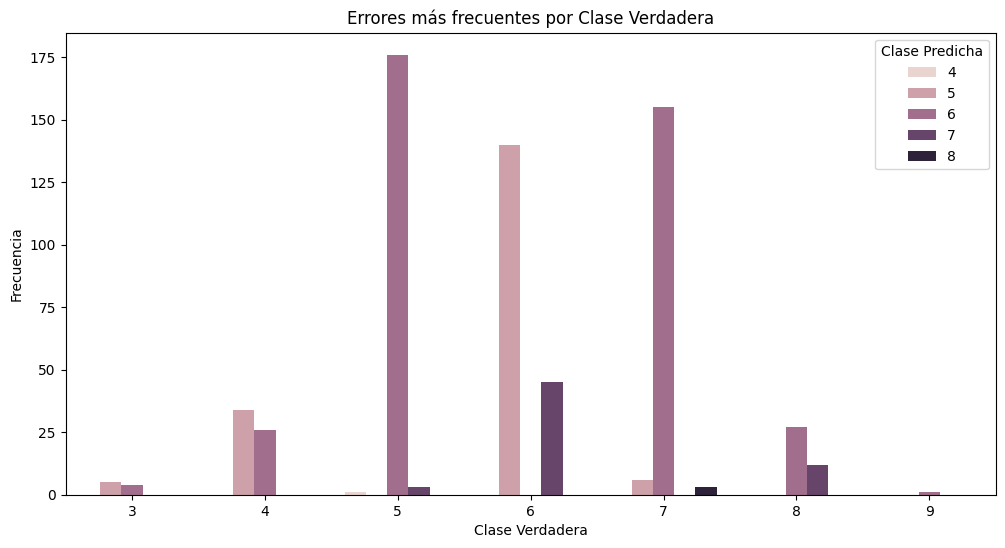

In [19]:
# Crear un df con las predicciones y valores reales
errors_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Filtrar errores (donde la predicción es incorrecta)
errors_df['Error'] = errors_df['True Label'] != errors_df['Predicted Label']

# Resumen de los errores
error_summary = errors_df.groupby(['True Label', 'Predicted Label']).size().reset_index(name='Count')
print("Errores por combinación de etiquetas verdaderas y predichas:")
print(error_summary)

# Gráfico: Distribución de errores por clase verdadera
plt.figure(figsize=(10, 6))
sns.countplot(data=errors_df[errors_df['Error']], x='True Label', order=sorted(errors_df['True Label'].unique()))
plt.title('Distribución de Errores por Clase Verdadera')
plt.xlabel('Clase Verdadera')
plt.ylabel('Frecuencia de Errores')
plt.show()

# Gráfico: Confusiones más frecuentes
confusion_errors = error_summary[error_summary['True Label'] != error_summary['Predicted Label']]
plt.figure(figsize=(12, 6))
sns.barplot(data=confusion_errors, x='True Label', y='Count', hue='Predicted Label', dodge=True)
plt.title('Errores más frecuentes por Clase Verdadera')
plt.xlabel('Clase Verdadera')
plt.ylabel('Frecuencia')
plt.legend(title='Clase Predicha')
plt.show()

Mejoras que se pueden realizar: 
- Balanceo de clases: Técnicas como SMOTE, ponderación de clases.
- Ajuste adicional de hiperparámetros.
- Experimentación con otros modelos: Gradient Boosting, SVM, etc.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separar las columnas categóricas y numéricas
categorical_features = ['class']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Definir el transformador para One-Hot Encoding y Escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar el preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Verificar los tamaños y las primeras filas del conjunto preprocesado
print("Tamaño de X_train:", X_train_preprocessed.shape)
print("Tamaño de X_test:", X_test_preprocessed.shape)
print("\nPrimeras filas de X_train preprocesado:")
print(X_train_preprocessed[:5])


Tamaño de X_train: (4547, 13)
Tamaño de X_test: (1950, 13)

Primeras filas de X_train preprocesado:
[[-0.6300591  -0.30574131 -0.81830659  2.12096344 -0.47567833 -0.58397259
   0.46370603  0.49367494 -0.74256935  0.06280598 -0.94579865  0.
   1.        ]
 [-1.0167607  -0.91704916 -0.40727002  0.4045563  -0.65791015  0.14061948
   0.12905181  0.09710551  1.70309768 -0.76656129  0.19857242  0.
   1.        ]
 [-0.70739942 -0.12234896 -0.40727002  1.36741884 -0.20233062  1.81275501
   0.95688067  0.46062748 -0.4917317   0.13191992  0.19857242  0.
   1.        ]
 [ 0.37536504 -0.48913367  1.30538237 -0.60016983 -0.32381849 -0.24954548
   0.76313349 -1.13886921 -1.36966346 -0.21364977  0.19857242  0.
   1.        ]
 [ 0.29802472 -0.12234896 -0.47577612  0.84412398 -0.77939802 -0.86266184
   0.35802575 -0.34242561 -0.74256935 -0.62833341  0.19857242  0.
   1.        ]]


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Crear el modelo de Regresión Lineal
linear_model = LinearRegression()

# Definir las métricas a calcular
scoring_metrics = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Evaluar con validación cruzada (5 folds)
results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(linear_model, X_train_preprocessed, y_train, cv=5, scoring=scorer)
    results[metric_name] = (scores.mean(), scores.std())

# Mostrar resultados
print("Resultados de Regresión Lineal (validación cruzada):")
for metric, (mean_score, std_score) in results.items():
    print(f"{metric}: {mean_score:.4f} (+/- {std_score:.4f})")


Resultados de Regresión Lineal (validación cruzada):
MAE: 0.3553 (+/- 0.0115)
MSE: 0.2752 (+/- 0.1283)
R2: 0.8054 (+/- 0.0958)


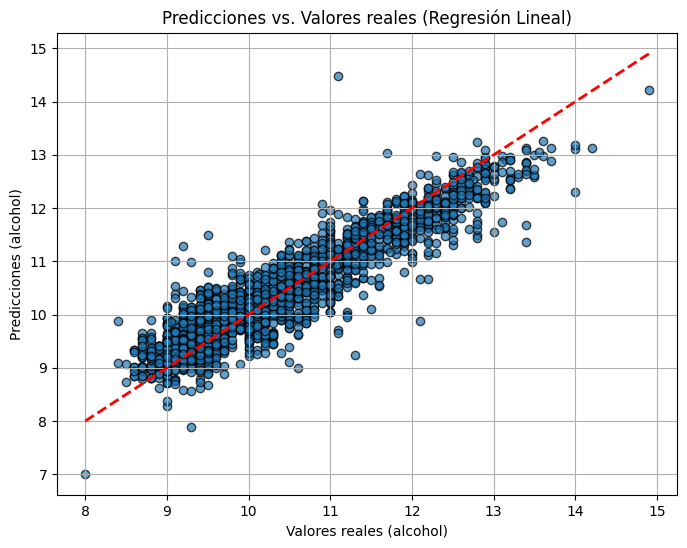

In [25]:
# Entrenar el modelo con todo el conjunto de entrenamiento
linear_model.fit(X_train_preprocessed, y_train)

# Generar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test_preprocessed)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
plt.title('Predicciones vs. Valores reales (Regresión Lineal)')
plt.xlabel('Valores reales (alcohol)')
plt.ylabel('Predicciones (alcohol)')
plt.grid()
plt.show()

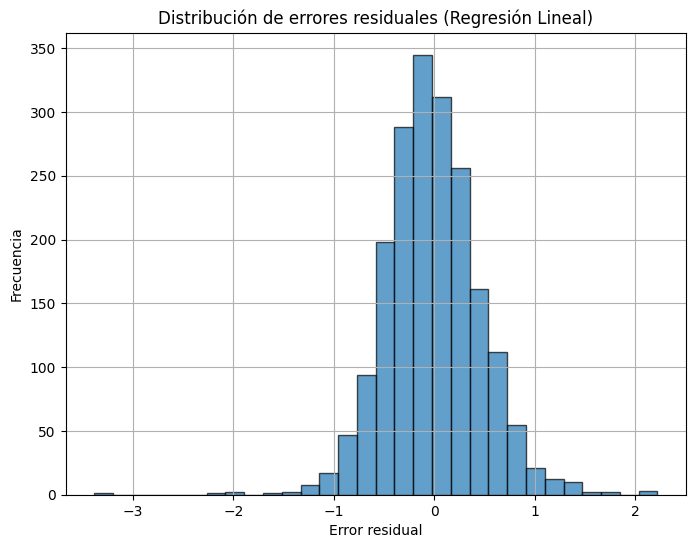

In [26]:
# Calcular errores residuales
residuals = y_test - y_pred

# Gráfico de distribución de errores residuales
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de errores residuales (Regresión Lineal)')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

In [27]:
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir las métricas a calcular
scoring_metrics = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Evaluar con validación cruzada (5 folds)
rf_results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=5, scoring=scorer)
    rf_results[metric_name] = (scores.mean(), scores.std())

# Mostrar resultados
print("Resultados de Random Forest Regressor (validación cruzada):")
for metric, (mean_score, std_score) in rf_results.items():
    print(f"{metric}: {mean_score:.4f} (+/- {std_score:.4f})")

# Entrenar el modelo final en todo el conjunto de entrenamiento
rf_model.fit(X_train_preprocessed, y_train)

# Generar predicciones en el conjunto de prueba
rf_y_pred = rf_model.predict(X_test_preprocessed)

# Calcular métricas en el conjunto de prueba
mae_test = mean_absolute_error(y_test, rf_y_pred)
mse_test = mean_squared_error(y_test, rf_y_pred)
r2_test = r2_score(y_test, rf_y_pred)

print("\nResultados en el conjunto de prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"R2: {r2_test:.4f}")

Resultados de Random Forest Regressor (validación cruzada):
MAE: 0.2893 (+/- 0.0133)
MSE: 0.1678 (+/- 0.0222)
R2: 0.8822 (+/- 0.0173)

Resultados en el conjunto de prueba:
MAE: 0.2792
MSE: 0.1710
R2: 0.8784


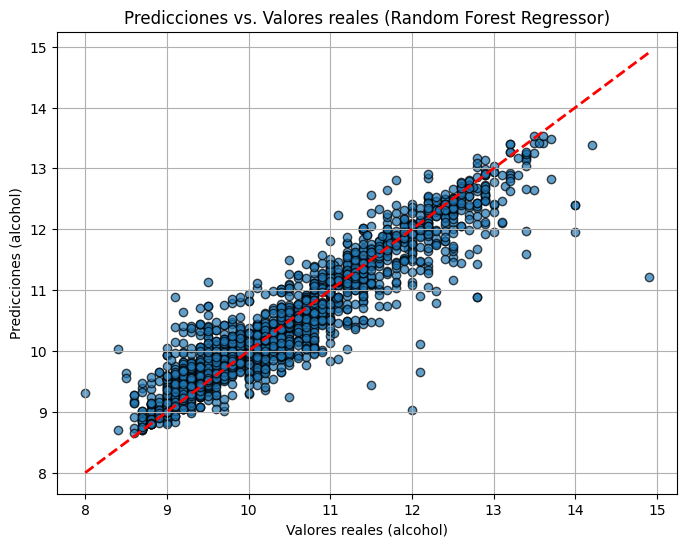

In [28]:
# Gráfico de dispersión: Predicciones vs Valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
plt.title('Predicciones vs. Valores reales (Random Forest Regressor)')
plt.xlabel('Valores reales (alcohol)')
plt.ylabel('Predicciones (alcohol)')
plt.grid()
plt.show()

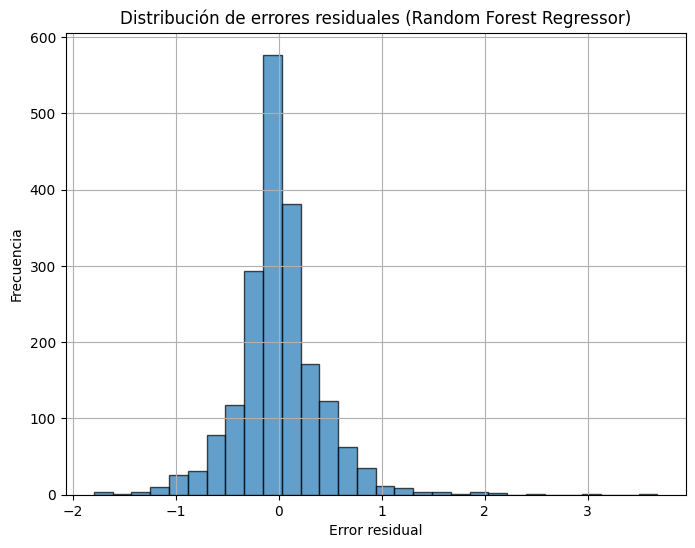

In [29]:
# Calcular errores residuales
rf_residuals = y_test - rf_y_pred

# Gráfico de distribución de errores residuales
plt.figure(figsize=(8, 6))
plt.hist(rf_residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de errores residuales (Random Forest Regressor)')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

- Random Forest es claramente un modelo mejor para este problema, ya que maneja mejor las relaciones no lineales y reduce significativamente los errores grandes.



In [30]:
# Definir el modelo base
rf_model_base = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model_base,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Métrica objetivo
    cv=3,  # Validación cruzada
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2  # Mostrar progreso
)

# Ejecutar la búsqueda
grid_search.fit(X_train_preprocessed, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo final con los mejores hiperparámetros
rf_best_model = grid_search.best_estimator_
rf_best_model.fit(X_train_preprocessed, y_train)

# Evaluar el modelo optimizado en el conjunto de prueba
rf_optimized_y_pred = rf_best_model.predict(X_test_preprocessed)
mae_optimized = mean_absolute_error(y_test, rf_optimized_y_pred)
mse_optimized = mean_squared_error(y_test, rf_optimized_y_pred)
r2_optimized = r2_score(y_test, rf_optimized_y_pred)

print("\nResultados del modelo optimizado en el conjunto de prueba:")
print(f"MAE: {mae_optimized:.4f}")
print(f"MSE: {mse_optimized:.4f}")
print(f"R2: {r2_optimized:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Resultados del modelo optimizado en el conjunto de prueba:
MAE: 0.2781
MSE: 0.1693
R2: 0.8796


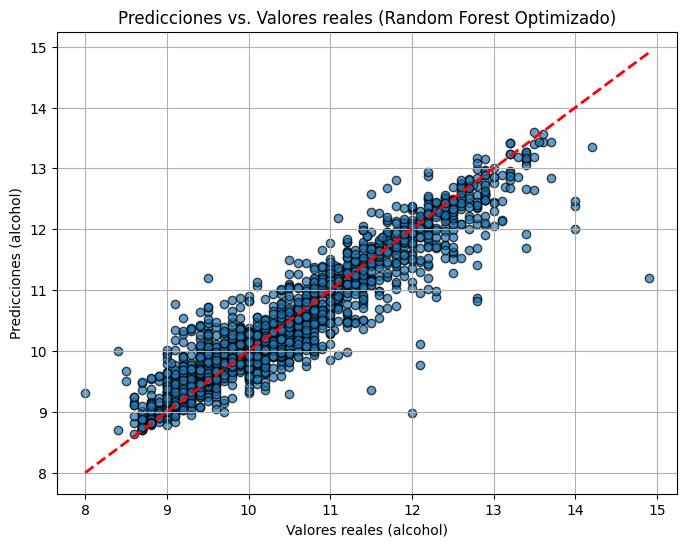

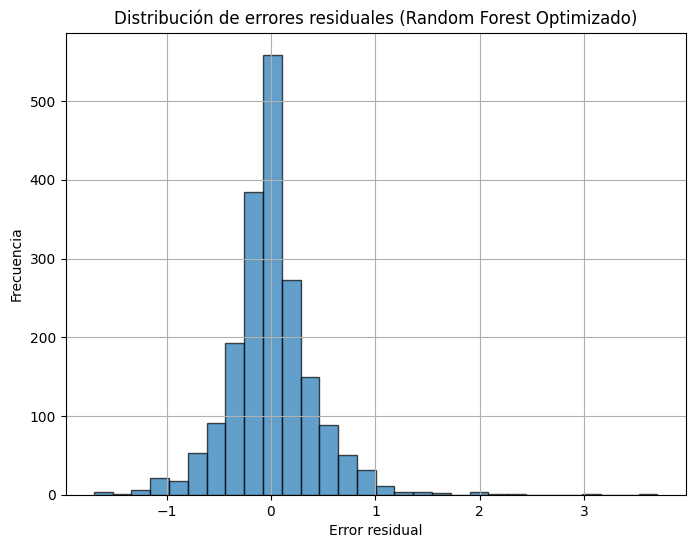

In [31]:
# Gráfico de dispersión: Predicciones vs Valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_optimized_y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea ideal
plt.title('Predicciones vs. Valores reales (Random Forest Optimizado)')
plt.xlabel('Valores reales (alcohol)')
plt.ylabel('Predicciones (alcohol)')
plt.grid()
plt.show()

# Calcular errores residuales
optimized_residuals = y_test - rf_optimized_y_pred

# Gráfico de distribución de errores residuales
plt.figure(figsize=(8, 6))
plt.hist(optimized_residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de errores residuales (Random Forest Optimizado)')
plt.xlabel('Error residual')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

- La optimización de los hiperparámetros ha mejorado la capacidad del modelo para capturar la relación entre las características y el alcohol, especialmente en valores extremos.

- Los errores son más pequeños y consistentes en el modelo optimizado.

Se puede decir que: 

El Random Forest optimizado es el mejor modelo para esta tarea, ya que:

- Maneja relaciones no lineales mejor que la Regresión Lineal.
- Reduce significativamente los errores grandes.
- Tiene un desempeño consistente en todos los rangos del target (alcohol).
